In [ ]:
import jax
import matplotlib.pyplot as plt # Grahpique
from jax import random # Pour ces clés
import numpy as np # Calcule numérique, fonctions cos,sin
import seaborn as sb # Style de graphique
sb.set_style("whitegrid")

clé = random.PRNGKey(0)
def get_key(index):
    """Récupère une clé unique basée sur un numéro d'index."""
    return random.fold_in(clé, index)

clés = [get_key(i) for i in range(10)] # On garde 10 clés

Les fonctions ondulatoire sont définies comme
$$f_1(t) = A \cos(\omega t + \phi)  \quad\text{    et    } \quad  f_2(t) = A \sin(\omega t + \phi) $$

Où
  - A est l'amplitude
  - $\omega$ est la fréquence angulaire
  - $\phi$ est la phase

# Superpostion d'ondes
Soit $f_i(x, t)$ de $i$ à $n$ des fonctions ondulatoires se déplaçant dans la direction $x$, la superposition linéaire est
$$
f_T(x,t) = \sum_{i=1}^n f_i(x,t)
$$

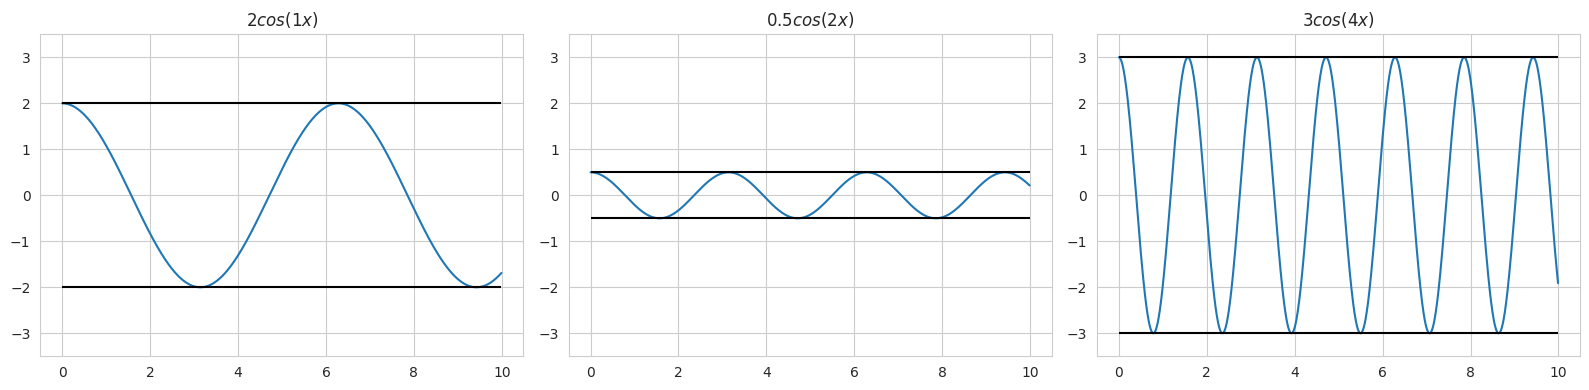

In [ ]:
class Fonction_ondulatoire:
  def __init__(self, amplitude = 1, fréquence_angulaire = 1,
               phase = 0, domaine = np.arange(0,10,0.01), cos = True):
    self.amplitude = amplitude
    self.fréquence_angulaire = fréquence_angulaire
    self.phase = phase
    self.vecteur = domaine
    self.cos = cos   # True: cos   False: sin
    self.points_échantillionés = None

  def fonction(self):
    if self.cos:
      return self.amplitude * np.cos(self.fréquence_angulaire * self.vecteur + self.phase)
    else: # Sinon sin
      return self.amplitude * np.sin(self.fréquence_angulaire * self.vecteur + self.phase)

  def plot(self, ylim ,nombre_total_graphique = 1, indice= 1,
           points_échantillioné = False, clé = -1, N= 50):
    """Doit gérer la figure à l'extérieur
      Pour échantillionnée, il faut précisé la clé
    """
    plt.subplot(1,nombre_total_graphique,indice)
    f = self.fonction()
    plt.plot(self.vecteur,f , label="Vrai fonction")
    plt.hlines(self.amplitude, xmax=max(self.vecteur), xmin=min(self.vecteur), color="black")
    plt.hlines(-self.amplitude,xmax= max(self.vecteur), xmin=min(self.vecteur), color="black")
    if self.cos:
      if self.phase == 0:
        plt.title(f"${self.amplitude}cos({self.fréquence_angulaire}x) $")
      else:
        plt.title(f"${self.amplitude}cos({self.fréquence_angulaire}x + {self.phase ::3.f}) $")
    else:
      if self.phase == 0:
        plt.title(f"${self.amplitude}sin({self.fréquence_angulaire}x) $")
      else:
        plt.title(f"${self.amplitude}sin({self.fréquence_angulaire}x + {self.phase ::3.f}) $")
    if points_échantillioné:
      x,y = self.échantillonage(clé, N)
      plt.scatter(x,y , color="violet", label="Points échantillionnées")
    #plt.legend()
    plt.ylim(ylim)
  def échantillonage(self, clé, N):
    x = random.uniform(clé, shape=(N, 1), minval=min(self.vecteur), maxval=max(self.vecteur))
    if self.cos:
      y = self.amplitude * np.cos(x * self.fréquence_angulaire + self.phase)
    else:
      y = self.amplitude * np.sin(x * self.fréquence_angulaire + self.phase)
    self.points_échantillionés = (x, y)
    return x, y

class Superposition_ondulatoire:
  def __init__(self, fonctions = [], domaine = np.arange(0,10,0.01)) :
    self.fonctions = fonctions
    self.vecteur = domaine

  def échantillonage(self, clé, N):
    x = random.uniform(clé, shape=(N, 1), minval=min(self.vecteur), maxval=2.0)
    y = 0
    for i in range(len(self.fonctions)):
      if self.fonctions[i].cos:
        y += self.fonctions[i].amplitude * np.cos(x * self.fonctions[i].fréquence_angulaire + self.phase)
      else:
        y += self.fonctions[i].amplitude * np.sin(x * self.fonctions[i].fréquence_angulaire + self.phase)
    return x, y

f1 = Fonction_ondulatoire(amplitude=2)
f2 = Fonction_ondulatoire(amplitude=0.5, fréquence_angulaire=2)
f3 = Fonction_ondulatoire(amplitude= 3, fréquence_angulaire=4)

figure = plt.figure(figsize=(16,4))
ylim =(-3.5,3.5)
f1.plot(ylim, nombre_total_graphique=3, indice=1)
f2.plot(ylim, nombre_total_graphique=3, indice=2)
f3.plot(ylim, nombre_total_graphique=3, indice=3)
plt.tight_layout()
plt.show()

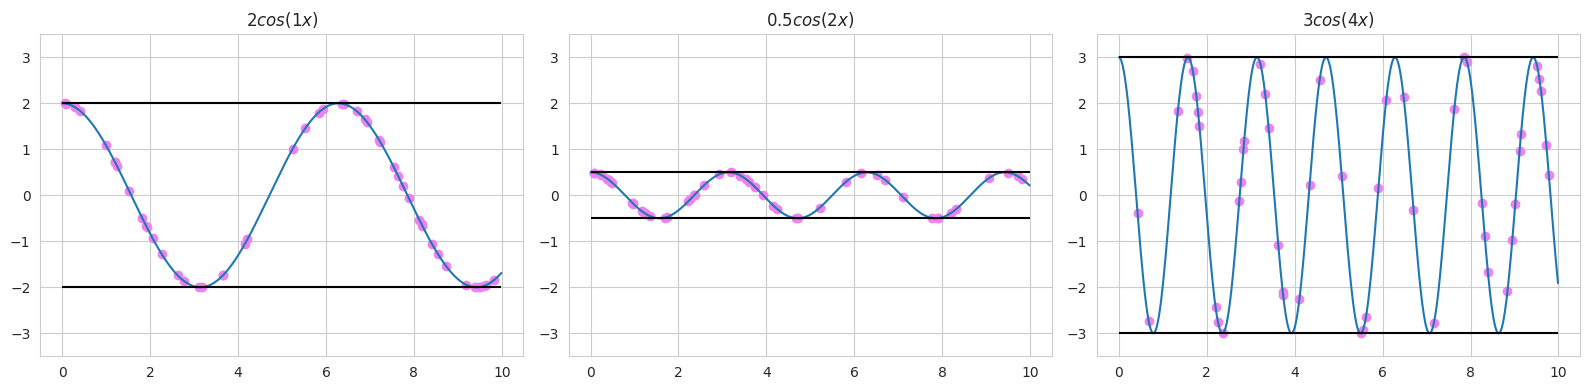

In [ ]:
figure = plt.figure(figsize=(16,4))
ylim =(-3.5,3.5)
f1.plot(ylim, nombre_total_graphique=3, indice=1, clé = clés[0], points_échantillioné=True)
f2.plot(ylim, nombre_total_graphique=3, indice=2, clé = clés[1], points_échantillioné=True)
f3.plot(ylim, nombre_total_graphique=3, indice=3, clé = clés[2], points_échantillioné=True)
plt.tight_layout()
plt.show()

In [ ]:
X = np.ones(f1.points_échantillionés[0].shape[0])
Y = f1.points_échantillionés[1]
X = np.column_stack((X, f1.points_échantillionés[0]))


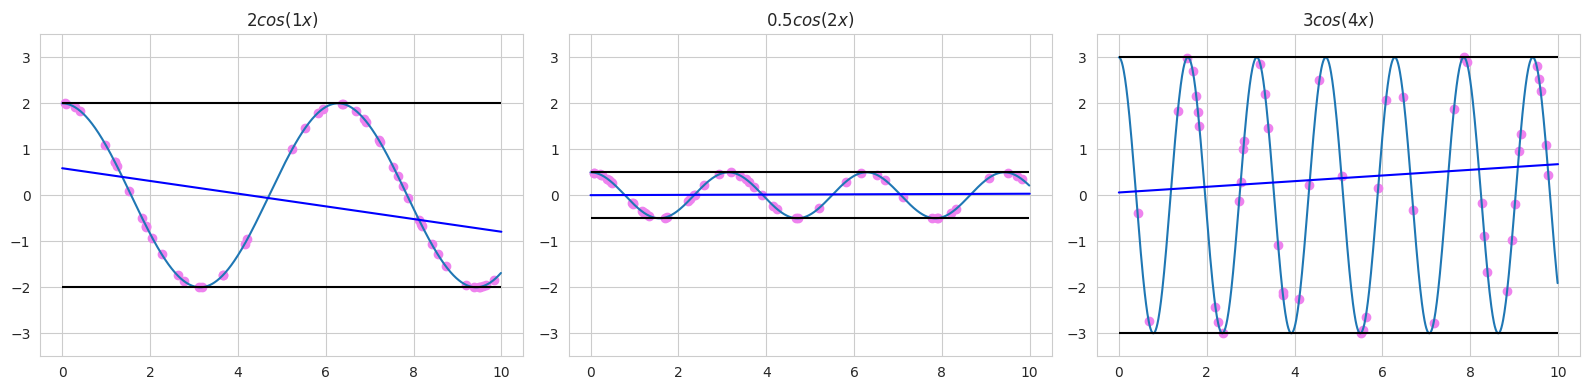

In [ ]:
import numpy as np
from numpy.linalg import inv as inv
def MCO(matrice_X : np.array, vec_Y : np.array) -> float:
  """ Calcule l'estimateur MCO des données"""
  return inv(matrice_X.T @ matrice_X) @ matrice_X.T @ vec_Y


figure = plt.figure(figsize=(16,4))
ylim =(-3.5,3.5)
f1.plot(ylim, nombre_total_graphique=3, indice=1, clé = clés[0], points_échantillioné=True)
X = np.ones(f1.points_échantillionés[0].shape[0])
X = np.column_stack((X, f1.points_échantillionés[0]))
Y = f1.points_échantillionés[1]
mco = MCO(X,Y)
x_mco = np.array([0,10])
y_mco = np.array([mco[0], mco[0] + 10*mco[1]])
plt.plot(x_mco,y_mco, c="blue", label="Droite MCO")

f2.plot(ylim, nombre_total_graphique=3, indice=2, clé = clés[1], points_échantillioné=True)
X = f2.points_échantillionés[0]
Y = f2.points_échantillionés[1]
mco = MCO(X,Y)
x_mco = np.array([0,10])
y_mco = np.array([mco[0], mco[0] + 10*mco[1]])
plt.plot(x_mco,y_mco, c="blue", label="Droite MCO")

f3.plot(ylim, nombre_total_graphique=3, indice=3, clé = clés[2], points_échantillioné=True)
X = f3.points_échantillionés[0]
Y = f3.points_échantillionés[1]
mco = MCO(X,Y)
x_mco = np.array([0,10])
y_mco = np.array([mco[0], mco[0] + 10*mco[1]])
plt.plot(x_mco,y_mco, c="blue", label="Droite MCO")

plt.tight_layout()
plt.show()






/tmp/ipython-input-2367351761.py:9: RuntimeWarning: Mean of empty slice.
  valeur = vec_Y[masque].mean()
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


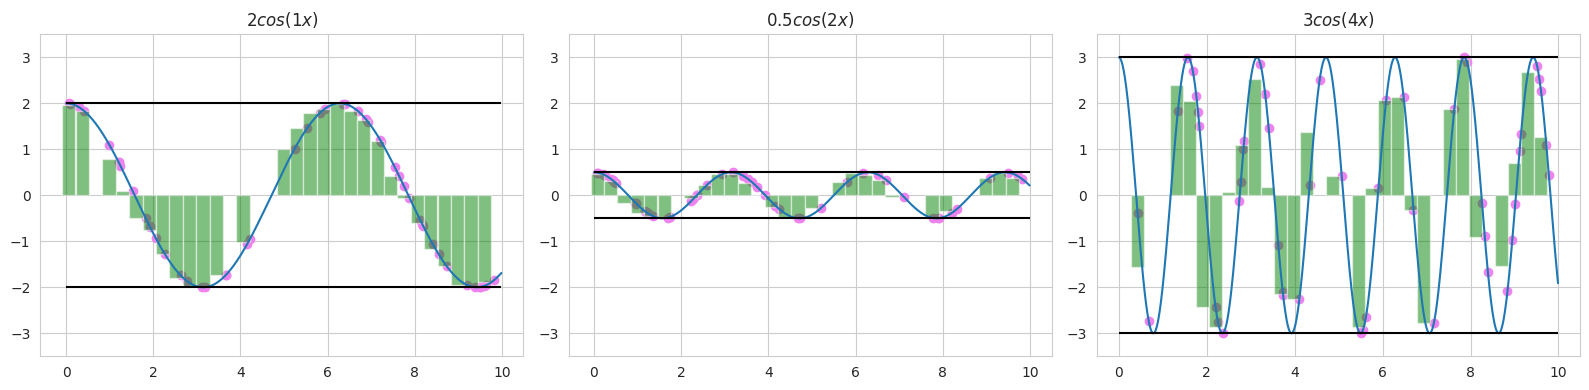

In [ ]:
def bacs(vec_X, vec_Y, nb_bacs= 10):
  vec_X = vec_X.flatten()
  vec_Y = vec_Y.flatten()
  pas = abs(max(vec_X) + 1 - min(vec_X)) / nb_bacs
  bacs = []
  val_actuel = min(vec_X)
  while val_actuel < max(vec_X) + 1e-6:
    masque = (vec_X >= val_actuel) & (vec_X < val_actuel + pas)
    valeur = vec_Y[masque].mean()
    bacs.append(valeur)
    val_actuel += pas
  x = [min(vec_X) + i * pas for i in range(0, len(bacs))]
  return x, bacs


figure = plt.figure(figsize=(16,4))
ylim =(-3.5,3.5)
f1.plot(ylim, nombre_total_graphique=3, indice=1, clé = clés[0], points_échantillioné=True)
X = f1.points_échantillionés[0]
Y = f1.points_échantillionés[1]
#plt.axhline(MCO(X,Y), c="red", label="Droite MCO")
x_bac, b = bacs(X,Y, 35)
plt.bar(x_bac, b, alpha = 0.5,width = abs(max(X)-min(X))/len(b),label="Estimation non paramétrique", color="green")

f2.plot(ylim, nombre_total_graphique=3, indice=2, clé = clés[1], points_échantillioné=True)
X = f2.points_échantillionés[0]
Y = f2.points_échantillionés[1]
#plt.axhline(MCO(X,Y), c="red", label="Droite MCO")
x_bac, b = bacs(X,Y, 35)
plt.bar(x_bac, b, alpha = 0.5,width = abs(max(X)-min(X))/len(b),label="Estimation non paramétrique", color="green")

f3.plot(ylim, nombre_total_graphique=3, indice=3, clé = clés[2], points_échantillioné=True)
X = f3.points_échantillionés[0]
Y = f3.points_échantillionés[1]
#plt.axhline(MCO(X,Y), c="red", label="Droite MCO")
x_bac, b = bacs(X,Y, 35)
plt.bar(x_bac, b, alpha = 0.5,width = abs(max(X)-min(X))/len(b),label="Estimation non paramétrique", color="green")
plt.tight_layout()
plt.show()

